In [1]:
%matplotlib inline
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from scipy import stats
import sys

In [31]:
matrixMalEX="data_GG.csv"
matrixMal="data_GM.csv"
matrixIt="data_L.csv"
n_qty=2 #CAMBIAR SEGUN LA CANTIDAD DE NODOS USADOS
n_groups= 2
repet = 3 #CAMBIAR EL PRIMER NUMERO SEGUN NUMERO DE EJECUCIONES POR CONFIG

p_value = 0.05
values = [2, 10, 20, 40]
dist_names = ['null', 'WorstFit', 'BestFit']

labelsP = [['(2,2)', '(2,10)', '(2,20)', '(2,40)'],['(10,2)', '(10,10)', '(10,20)', '(10,40)'],
          ['(20,2)', '(20,10)', '(20,20)', '(20,40)'],['(40,2)', '(40,10)', '(40,20)', '(40,40)']]
labelsP_J = ['(2,2)', '(2,10)', '(2,20)', '(2,40)','(10,2)', '(10,10)', '(10,20)', '(10,40)',
              '(20,2)', '(20,10)', '(20,20)', '(20,40)','(40,2)', '(40,10)', '(40,20)', '(40,40)']
positions = [321, 322, 323, 324, 325]
positions_small = [221, 222, 223, 224]

In [32]:
dfG = pd.read_csv( matrixMalEX )

dfG = dfG.drop(columns=dfG.columns[0])
dfG['S'] = dfG['N']
dfG['N'] = dfG['S'] + dfG['%Async']
dfG['%Async'] = (dfG['%Async'] / dfG['N']) * 100

if(n_qty == 1):
    group = dfG.groupby(['%Async', 'Groups'])['TE']
else:        
    group = dfG.groupby(['Dist', '%Async', 'Groups'])['TE']

#group
grouped_aggG = group.agg(['mean'])
grouped_aggG.rename(columns={'mean':'TE',}, inplace=True)

In [33]:
dfM = pd.read_csv( matrixMal )
dfM = dfM.drop(columns=dfM.columns[0])

dfM['S'] = dfM['N']
dfM['N'] = dfM['S'] + dfM['%Async']
dfM["TR"] = dfM["TC"] + dfM["TS"] + dfM["TA"]
dfM['%Async'] = (dfM['%Async'] / dfM['N']) * 100

if(n_qty == 1):
    groupM = dfM.groupby(['%Async','NP', 'NS'])['TC', 'TS', 'TA', 'TR']
else:
    groupM = dfM.groupby(['Dist', '%Async','NP', 'NS'])['TC', 'TS', 'TA', 'TR']

#group
grouped_aggM = groupM.agg(['mean'])
grouped_aggM.columns = grouped_aggM.columns.get_level_values(0)

In [34]:
dfL = pd.read_csv( matrixIt )
dfL = dfL.drop(columns=dfL.columns[0])

if(n_qty == 1):
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', '%Async', 'NP', 'NS'])['Ti', 'To']
else:
    groupL = dfL[dfL['NS'] != 0].groupby(['Tt', 'Dist', '%Async', 'NP', 'NS'])['Ti', 'To']

#group
grouped_aggL = groupL.agg(['mean', 'count'])
grouped_aggL.columns = grouped_aggL.columns.get_level_values(0)
grouped_aggL.set_axis(['Ti', 'Iters', 'To', 'Iters2'], axis='columns')

grouped_aggL['Iters'] = np.round(grouped_aggL['Iters']/repet)
grouped_aggL['Iters2'] = np.round(grouped_aggL['Iters2']/repet)

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  if sys.path[0] == '':


In [35]:
grouped_aggL.to_excel("resultL.xlsx") 
grouped_aggM.to_excel("resultM.xlsx") 
grouped_aggG.to_excel("resultG.xlsx") 

In [36]:
dfG

N  %Async Groups Dist  Matrix  CommTam  Time Iters         TE  \
0    1000000000     0.0  20,40  2,2  100000  1000000   2.0  1,10  24.655622   
1    1000000000     0.0  20,40  2,2  100000  1000000   2.0  1,10  24.614192   
2    1000000000     0.0  20,40  2,2  100000  1000000   2.0  1,10  24.561815   
3    1000000000    75.0  10,40  1,1  100000  1000000   2.0  1,10  25.073783   
4    1000000000    75.0  10,40  1,1  100000  1000000   2.0  1,10  24.690559   
..          ...     ...    ...  ...     ...      ...   ...   ...        ...   
475  1000000000    50.0  10,10  2,2  100000  1000000   2.0  1,10  22.716362   
476  1000000000    50.0  10,10  2,2  100000  1000000   2.0  1,10  22.787608   
477  1000000000    50.0  40,20  1,1  100000  1000000   2.0  1,10  26.209435   
478  1000000000    50.0  40,20  1,1  100000  1000000   2.0  1,10  26.113280   
479  1000000000    50.0  40,20  1,1  100000  1000000   2.0  1,10  25.939109   

              S  
0    1000000000  
1    1000000000  
2    1000000000  
3     250000000  
4     250000000  
..          ...  
475   500000000  
476   500000000  
477   500000000  
478   500000000  
479   500000000  

[480 rows x 10 columns]

In [37]:
grouped_aggG

TE
Dist %Async Groups           
1,1  0.0    10,10   22.484111
            10,2    22.759883
            10,20   22.714897
            10,40   23.945593
            2,10    22.787837
...                       ...
2,2  100.0  20,40   26.541437
            40,10   25.792615
            40,2    24.536055
            40,20   27.124025
            40,40   27.393826

[160 rows x 1 columns]

In [38]:
dfM

N  %Async  NP  NS Dist  Matrix  CommTam  Time Iters        TC  \
0    1000000000     0.0  20  40  2,2  100000  1000000   2.0  1,10  1.380795   
1    1000000000     0.0  20  40  2,2  100000  1000000   2.0  1,10  1.444811   
2    1000000000     0.0  20  40  2,2  100000  1000000   2.0  1,10  1.429329   
3    1000000000    75.0  10  40  1,1  100000  1000000   2.0  1,10  1.275007   
4    1000000000    75.0  10  40  1,1  100000  1000000   2.0  1,10  1.218877   
..          ...     ...  ..  ..  ...     ...      ...   ...   ...       ...   
475  1000000000    50.0  10  10  2,2  100000  1000000   2.0  1,10  0.550302   
476  1000000000    50.0  10  10  2,2  100000  1000000   2.0  1,10  0.565259   
477  1000000000    50.0  40  20  1,1  100000  1000000   2.0  1,10  1.126832   
478  1000000000    50.0  40  20  1,1  100000  1000000   2.0  1,10  1.136094   
479  1000000000    50.0  40  20  1,1  100000  1000000   2.0  1,10  1.100109   

           TS        TA           S        TR  
0    1.179880  0.000000  1000000000  2.560675  
1    1.031978  0.000000  1000000000  2.476789  
2    1.019891  0.000000  1000000000  2.449220  
3    0.159546  3.739863   250000000  5.174416  
4    0.136006  3.434968   250000000  4.789851  
..        ...       ...         ...       ...  
475  0.039950  2.183129   500000000  2.773381  
476  0.041073  2.220328   500000000  2.826660  
477  0.377649  4.985516   500000000  6.489997  
478  0.399998  4.883929   500000000  6.420021  
479  0.345791  4.765733   500000000  6.211633  

[480 rows x 14 columns]

In [39]:
grouped_aggM

TC        TS        TA        TR
Dist %Async NP NS                                        
1,1  0.0    2  2   0.241944  0.327792  0.000000  0.569736
               10  0.303633  0.438643  0.000000  0.742276
               20  0.440566  0.502550  0.000000  0.943115
               40  0.973248  0.625712  0.000000  1.598960
            10 2   0.266382  0.420096  0.000000  0.686478
...                     ...       ...       ...       ...
2,2  100.0  20 40  1.398970  0.000000  5.048009  6.446979
            40 2   0.614688  0.000000  3.868392  4.483079
               10  1.019837  0.000000  4.705335  5.725172
               20  1.385920  0.000000  5.640753  7.026673
               40  1.477186  0.000000  5.811504  7.288690

[160 rows x 4 columns]

In [40]:
dfL

N  %Async  NP  N_par  NS  Dist  Compute_tam  Comm_tam  Time  \
0     1000000000     0.0  40     20   0     2       100000   1000000   2.0   
1     1000000000     0.0  40     20   0     2       100000   1000000   2.0   
2     1000000000     0.0  40     20   0     2       100000   1000000   2.0   
3     1000000000     0.0  40     20   0     2       100000   1000000   2.0   
4     1000000000     0.0  40     20   0     2       100000   1000000   2.0   
...          ...     ...  ..    ...  ..   ...          ...       ...   ...   
5275  1000000000    50.0  20     40   0     1       100000   1000000   2.0   
5276  1000000000    50.0  20     40   0     1       100000   1000000   2.0   
5277  1000000000    50.0  20     40   0     1       100000   1000000   2.0   
5278  1000000000    50.0  20     40   0     1       100000   1000000   2.0   
5279  1000000000    50.0  20     40   0     1       100000   1000000   2.0   

      Iters        Ti   Tt      To  
0        10  2.039676  0.0  2242.0  
1        10  2.002848  0.0  2242.0  
2        10  2.002108  0.0  2242.0  
3        10  2.002966  0.0  2242.0  
4        10  2.003438  0.0  2242.0  
...     ...       ...  ...     ...  
5275     10  2.000410  0.0  2241.0  
5276     10  2.000693  0.0  2241.0  
5277     10  2.000654  0.0  2241.0  
5278     10  2.000830  0.0  2241.0  
5279     10  2.000683  0.0  2241.0  

[5280 rows x 13 columns]

In [41]:
grouped_aggL

Ti  Iters           To  Iters2
Tt  Dist %Async NP NS                                      
0.0 1    0.0    2  2   1.999980    1.0  2241.666667     1.0
                   10  2.000285    1.0  2241.666667     1.0
                   20  1.999927    1.0  2241.666667     1.0
                   40  2.000288    1.0  2242.000000     1.0
                10 2   2.001407    1.0  2241.333333     1.0
...                         ...    ...          ...     ...
1.0 2    100.0  20 40  4.980324    1.0  2242.000000     1.0
                40 2   3.862025    1.0  2242.000000     1.0
                   10  4.664625    1.0  2241.333333     1.0
                   20  5.541510    1.0  2241.666667     1.0
                   40  5.728025    1.0  2241.666667     1.0

[288 rows x 4 columns]

In [42]:
print("TIEMPO EJECUCCION")
sinc = 0
asinc = 0
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                group = str(numP) + "," + str(numC)
                v1 = dfG[(dfG["%Async"] == 0.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                v2 = dfG[(dfG["%Async"] == 100.0)][(dfG.Groups == group)][(dfG["Dist"] == dist_v)]['TE']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggG['TE'].loc[(dist_v, 0.0, group)] - grouped_aggG['TE'].loc[(dist_v, 100.0, group)]
                if diff > 0:
                    mejor = "Asíncrono"
                    asinc+=1
                else:
                    mejor = "Síncrono"
                    sinc+=1
                    
                if res[1] < p_value:
                    print("EX numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)
print("SINC: " + str(sinc) + " || ASINC: " + str(asinc))

TIEMPO EJECUCCION
Distribución WorstFit -------------------------
Para  2  padres
EX numC= 2 p = 0.0 Diff = 0.302 Asíncrono
EX numC= 10 p = 0.0 Diff = 0.434 Asíncrono
EX numC= 20 p = 0.0 Diff = 0.467 Asíncrono
Para  10  padres
EX numC= 2 p = 0.0 Diff = 0.458 Asíncrono
EX numC= 10 p = 0.034 Diff = 0.072 Asíncrono
EX numC= 20 p = 0.025 Diff = 0.117 Asíncrono
Para  20  padres
EX numC= 2 p = 0.0 Diff = 0.488 Asíncrono
EX numC= 20 p = 0.043 Diff = 0.224 Síncrono
EX numC= 40 p = 0.0 Diff = 1.514 Síncrono
Para  40  padres
EX numC= 2 p = 0.006 Diff = 0.786 Síncrono
EX numC= 10 p = 0.0 Diff = 1.678 Síncrono
EX numC= 20 p = 0.0 Diff = 1.737 Síncrono
EX numC= 40 p = 0.0 Diff = 2.866 Síncrono
Distribución BestFit -------------------------
Para  2  padres
EX numC= 2 p = 0.001 Diff = 0.324 Asíncrono
EX numC= 10 p = 0.001 Diff = 0.422 Asíncrono
EX numC= 40 p = 0.046 Diff = 0.301 Asíncrono
Para  10  padres
EX numC= 2 p = 0.001 Diff = 0.348 Asíncrono
EX numC= 10 p = 0.04 Diff = 0.152 Síncrono
EX numC= 

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


EX numC= 20 p = 0.003 Diff = 2.748 Síncrono
EX numC= 40 p = 0.0 Diff = 1.931 Síncrono
Para  40  padres
EX numC= 2 p = 0.04 Diff = 0.636 Síncrono
EX numC= 10 p = 0.0 Diff = 1.818 Síncrono
EX numC= 20 p = 0.0 Diff = 2.432 Síncrono
EX numC= 40 p = 0.0 Diff = 2.902 Síncrono
SINC: 18 || ASINC: 14


In [43]:
print("TIEMPO MALLEABILITY")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                v1 = dfM[(dfM["%Async"] == 0.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TS']
                v2 = dfM[(dfM["%Async"] == 100.0)][(dfM.NP == numP)][(dfM.NS == numC)][(dfM["Dist"] == dist_v)]['TA']
                res = stats.ttest_ind(v1, v2)
                diff = grouped_aggM['TS'].loc[(dist_v, 0.0, numP, numC)] - grouped_aggM['TA'].loc[(dist_v, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    print("TR numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,3)), mejor)

TIEMPO MALLEABILITY
Distribución WorstFit -------------------------
Para  2  padres
TR numC= 2 p = 0.0 Diff = 1.686 Síncrono
TR numC= 10 p = 0.0 Diff = 1.572 Síncrono
TR numC= 20 p = 0.0 Diff = 1.508 Síncrono
TR numC= 40 p = 0.0 Diff = 1.698 Síncrono
Para  10  padres
TR numC= 2 p = 0.0 Diff = 1.589 Síncrono
TR numC= 10 p = 0.0 Diff = 1.928 Síncrono
TR numC= 20 p = 0.0 Diff = 1.891 Síncrono
TR numC= 40 p = 0.005 Diff = 2.69 Síncrono
Para  20  padres
TR numC= 2 p = 0.0 Diff = 1.525 Síncrono
TR numC= 10 p = 0.0 Diff = 2.013 Síncrono
TR numC= 20 p = 0.0 Diff = 2.244 Síncrono
TR numC= 40 p = 0.0 Diff = 3.538 Síncrono
Para  40  padres
TR numC= 2 p = 0.0 Diff = 2.815 Síncrono
TR numC= 10 p = 0.0 Diff = 3.669 Síncrono
TR numC= 20 p = 0.0 Diff = 3.853 Síncrono
TR numC= 40 p = 0.0 Diff = 4.887 Síncrono
Distribución BestFit -------------------------
Para  2  padres
TR numC= 2 p = 0.0 Diff = 1.683 Síncrono
TR numC= 10 p = 0.0 Diff = 1.581 Síncrono
TR numC= 20 p = 0.0 Diff = 2.01 Síncrono
TR numC= 

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


TR numC= 20 p = 0.0 Diff = 3.5 Síncrono
TR numC= 40 p = 0.0 Diff = 3.493 Síncrono
Para  20  padres
TR numC= 2 p = 0.0 Diff = 2.971 Síncrono
TR numC= 10 p = 0.0 Diff = 3.742 Síncrono
TR numC= 20 p = 0.0 Diff = 4.677 Síncrono
TR numC= 40 p = 0.0 Diff = 3.971 Síncrono
Para  40  padres
TR numC= 2 p = 0.0 Diff = 2.675 Síncrono
TR numC= 10 p = 0.0 Diff = 3.786 Síncrono
TR numC= 20 p = 0.0 Diff = 4.418 Síncrono
TR numC= 40 p = 0.0 Diff = 4.924 Síncrono


In [44]:
print("TIEMPO Iters")
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                #exp = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == 1)][(dfL["%Async"] == 0.0)][(dfL.NP == numP)][(dfL.NS == numC)]
                #TimeOp = exp['Ti'] 
                #print(TimeOp)
                v1 = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                v2 = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == 100.0)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti']
                res = stats.ttest_ind(v1, v2, equal_var = False)
                diff = grouped_aggL['Ti'].loc[(0, dist, 100.0, numP, numC)] - grouped_aggL['Ti'].loc[(1, dist, 100.0, numP, numC)]
                if diff > 0:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                if res[1] < p_value:
                    #and abs(diff) > grouped_aggL['Ti'].loc[(0, dist, 0.0, numP, numC)]
                    print("Ti numC=", numC, "p =", round(res[1],3), "Diff =", abs(round(diff,4)), mejor)

TIEMPO Iters
Distribución WorstFit -------------------------
Para  2  padres
Para  10  padres
Para  20  padres
Ti numC= 20 p = 0.014 Diff = 0.3159 Síncrono
Ti numC= 40 p = 0.0 Diff = 2.1203 Síncrono
Para  40  padres
Ti numC= 2 p = 0.002 Diff = 1.5824 Síncrono
Ti numC= 10 p = 0.0 Diff = 2.3873 Síncrono
Ti numC= 20 p = 0.0 Diff = 2.5714 Síncrono
Ti numC= 40 p = 0.005 Diff = 3.8153 Síncrono
Distribución BestFit -------------------------
Para  2  padres


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


Ti numC= 20 p = 0.007 Diff = 0.6198 Síncrono
Ti numC= 40 p = 0.006 Diff = 0.7004 Síncrono
Para  10  padres
Ti numC= 10 p = 0.023 Diff = 0.231 Síncrono
Ti numC= 20 p = 0.0 Diff = 2.163 Síncrono
Ti numC= 40 p = 0.002 Diff = 2.1709 Síncrono
Para  20  padres
Ti numC= 2 p = 0.004 Diff = 2.0084 Síncrono
Ti numC= 10 p = 0.0 Diff = 2.477 Síncrono
Ti numC= 20 p = 0.013 Diff = 3.3594 Síncrono
Ti numC= 40 p = 0.001 Diff = 2.9773 Síncrono
Para  40  padres
Ti numC= 2 p = 0.004 Diff = 1.8585 Síncrono
Ti numC= 10 p = 0.0 Diff = 2.6598 Síncrono
Ti numC= 20 p = 0.003 Diff = 3.5383 Síncrono
Ti numC= 40 p = 0.002 Diff = 3.7241 Síncrono


In [45]:
auxIter = pd.DataFrame(dfM['Iters'].str.split(',',1).tolist(),columns = ['Iters0','Iters1'])
auxIter['Iters1'] = pd.to_numeric(auxIter['Iters1'], errors='coerce')
iters = auxIter['Iters1'].mean()
print(iters)


10.0


In [46]:
#iters = dfM['Iters'].mean()
resultados = [0,0]
for dist in [1,2]:
    print("Distribución " + dist_names[dist] + " -------------------------")
    dist_v = str(dist)+","+str(dist)
    for numP in values:
        print("Para ", numP, " padres")
        for numC in values:
            #if numP != numC:
                Titer = dfL[(dfL["Tt"] == 0)][(dfL["Dist"] == dist)][(dfL.NP == numC)]['Ti'].mean() #Tiempo por iteracion
                i=0
                for adr in [0.0, 100.0]:
                
                    auxExp = dfM[(dfM["Dist"] == dist_v)][(dfM["%Async"] == adr)][(dfM.NP == numP)][(dfM.NS == numC)]
                    Tr = auxExp['TS'].mean() + auxExp['TA'].mean() #Tiempo de redistribucion
                    M_it = dfL[(dfL["Tt"] == 1)][(dfL["Dist"] == dist)][(dfL["%Async"] == adr)][(dfL.NP == numP)][(dfL.NS == numC)]['Ti'].count()/3 #Iteraciones asincronas
                    #No se presupone una diferencia temporal entre iteraciones normales y asincronas
                    if(M_it > iters):
                        M_it = iters
                    resultados[i] = (iters - M_it) * Titer + Tr
                    i+=1

                if resultados[0] > resultados[1]:
                    mejor = "Asíncrono"
                else:
                    mejor = "Síncrono"
                diff = abs(round(resultados[0] - resultados[1], 3))
                print("NC="+ str(numC) + " Es mejor " + mejor + " con una diff de "+  str(diff))
                #TODO Comprobar

Distribución WorstFit -------------------------
Para  2  padres
NC=2 Es mejor Asíncrono con una diff de 0.319
NC=10 Es mejor Asíncrono con una diff de 0.431
NC=20 Es mejor Asíncrono con una diff de 0.494
NC=40 Es mejor Asíncrono con una diff de 0.307
Para  10  padres
NC=2 Es mejor Asíncrono con una diff de 0.415
NC=10 Es mejor Asíncrono con una diff de 0.075
NC=20 Es mejor Asíncrono con una diff de 0.112
NC=40 Es mejor Síncrono con una diff de 0.685
Para  20  padres


/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


NC=2 Es mejor Asíncrono con una diff de 0.479
NC=10 Es mejor Síncrono con una diff de 0.01
NC=20 Es mejor Síncrono con una diff de 0.241
NC=40 Es mejor Síncrono con una diff de 1.533
Para  40  padres
NC=2 Es mejor Síncrono con una diff de 0.811
NC=10 Es mejor Síncrono con una diff de 1.665
NC=20 Es mejor Síncrono con una diff de 1.85
NC=40 Es mejor Síncrono con una diff de 2.882
Distribución BestFit -------------------------
Para  2  padres
NC=2 Es mejor Asíncrono con una diff de 0.319
NC=10 Es mejor Asíncrono con una diff de 0.421
NC=20 Es mejor Síncrono con una diff de 0.005
NC=40 Es mejor Asíncrono con una diff de 0.287
Para  10  padres
NC=2 Es mejor Asíncrono con una diff de 0.349
NC=10 Es mejor Síncrono con una diff de 0.143
NC=20 Es mejor Síncrono con una diff de 1.495
NC=40 Es mejor Síncrono con una diff de 1.471
Para  20  padres
NC=2 Es mejor Síncrono con una diff de 0.969
NC=10 Es mejor Síncrono con una diff de 1.741
NC=20 Es mejor Síncrono con una diff de 2.673
NC=40 Es mejor

A partir de aquí se muestran gráficos

In [47]:
#Reserva de memoria para las estructuras
TP_data=[0]*2
TH_data=[0]*2
TM_data=[0]*2

TP_A_data=[0]*2
TH_A_data=[0]*2
TM_A_data=[0]*2

for dist in [1,2]:
    dist_index=dist-1
    
    TP_data[dist_index]=[0]*len(values)*(len(values))
    TH_data[dist_index]=[0]*len(values)*(len(values))
    TM_data[dist_index]=[0]*len(values)*(len(values))

    TP_A_data[dist_index]=[0]*len(values)*(len(values))
    TH_A_data[dist_index]=[0]*len(values)*(len(values))
    TM_A_data[dist_index]=[0]*len(values)*(len(values))

# Obtencion de los grupos del dataframe necesarios

#ACTUALMENTE NO SE DIFERENCIAN LOS TIEMPOS DE ITERACIONES DE PADRES E HIJOS CUANDO COINCIDE EL NUMERO DE PROCESOS
if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['NP'])['Ti']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']
    groupL_aux = dfL[dfL['Tt'] == 0].groupby(['Dist', 'NP'])['Ti']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

grouped_aggL_aux = groupL_aux.agg(['mean'])
grouped_aggL_aux.columns = grouped_aggL_aux.columns.get_level_values(0)
grouped_aggL_aux.set_axis(['Ti'], axis='columns')

#Calculo de los valores para las figuras
#1=Best Fit
#2=Worst Fit
dist=1
for dist in [1,2]:
    dist_index=dist-1
    dist_v = str(dist)+","+str(dist)
    i=0
    r=0
    for numP in values:
        j=0
        for numC in values:
        
            tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
            for tipo in [0, 100]:
                iters_aux=dfM[(dfM["NP"] == numP)][(dfM["NS"] == numC)][(dfM["Dist"] == dist_v)][(dfM["%Async"] == tipo)]['Iters'].head(1).tolist()[0].split(',')
                itersP_aux = int(iters_aux[0])
                itersS_aux = int(iters_aux[1])
                iters_mal_aux = 0
                if tipo != 0:
                    iters_mal_aux = grouped_aggL['Iters'].loc[(1,dist,tipo,numP,numC)]
            
                t_iterP_aux = grouped_aggL_aux['Ti'].loc[(dist,numP)]
                t_iterS_aux = grouped_aggL_aux['Ti'].loc[(dist,numC)]
            
            
                p1 = t_iterP_aux * itersP_aux
                p2 = t_iterS_aux * max((itersS_aux - iters_mal_aux),0)
                
                array_aux = grouped_aggM[['TS', 'TA']].loc[(dist_v,tipo,numP,numC)].tolist()
                p3 = tc_real + array_aux[0] + array_aux[1]
                
                #Guardar datos
                if tipo == 0:
                    TP_data[dist_index][i*len(values) + j] = p1
                    TH_data[dist_index][i*len(values) + j] = p2
                    TM_data[dist_index][i*len(values) + j] = p3
                else:
                    TP_A_data[dist_index][i*len(values) + j] = p1
                    TH_A_data[dist_index][i*len(values) + j] = p2
                    TM_A_data[dist_index][i*len(values) + j] = p3
            j+=1
        i+=1
print(TP_A_data)
print(TH_A_data)
print(TM_A_data)

/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
/home/usuario/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[[2.004239557189542, 2.004239557189542, 2.004239557189542, 2.004239557189542, 2.0036251519607844, 2.0036251519607844, 2.0036251519607844, 2.0036251519607844, 2.002774753267974, 2.002774753267974, 2.002774753267974, 2.002774753267974, 2.005220606209152, 2.005220606209152, 2.005220606209152, 2.005220606209152], [2.0022725473856204, 2.0022725473856204, 2.0022725473856204, 2.0022725473856204, 2.001913400326798, 2.001913400326798, 2.001913400326798, 2.001913400326798, 2.004655240196078, 2.004655240196078, 2.004655240196078, 2.004655240196078, 2.022560447712418, 2.022560447712418, 2.022560447712418, 2.022560447712418]]
[[18.03815601470588, 18.032626367647058, 18.024972779411765, 18.04698545588237, 18.03815601470588, 18.032626367647058, 18.024972779411765, 18.04698545588237, 18.03815601470588, 18.032626367647058, 18.024972779411765, 18.04698545588237, 18.03815601470588, 18.032626367647058, 18.024972779411765, 18.04698545588237], [18.020452926470583, 18.017220602941183, 18.041897161764705, 18.

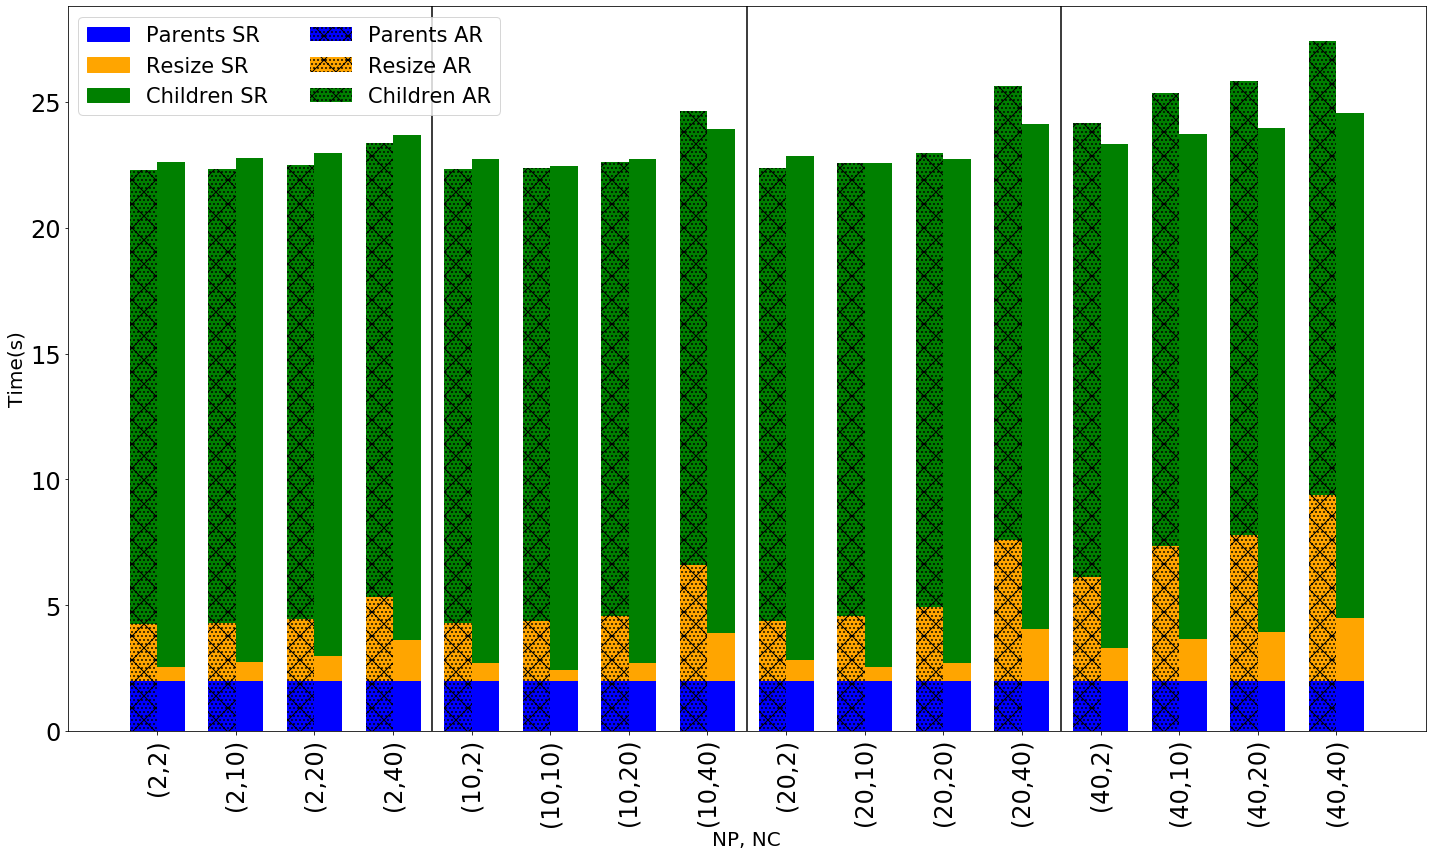

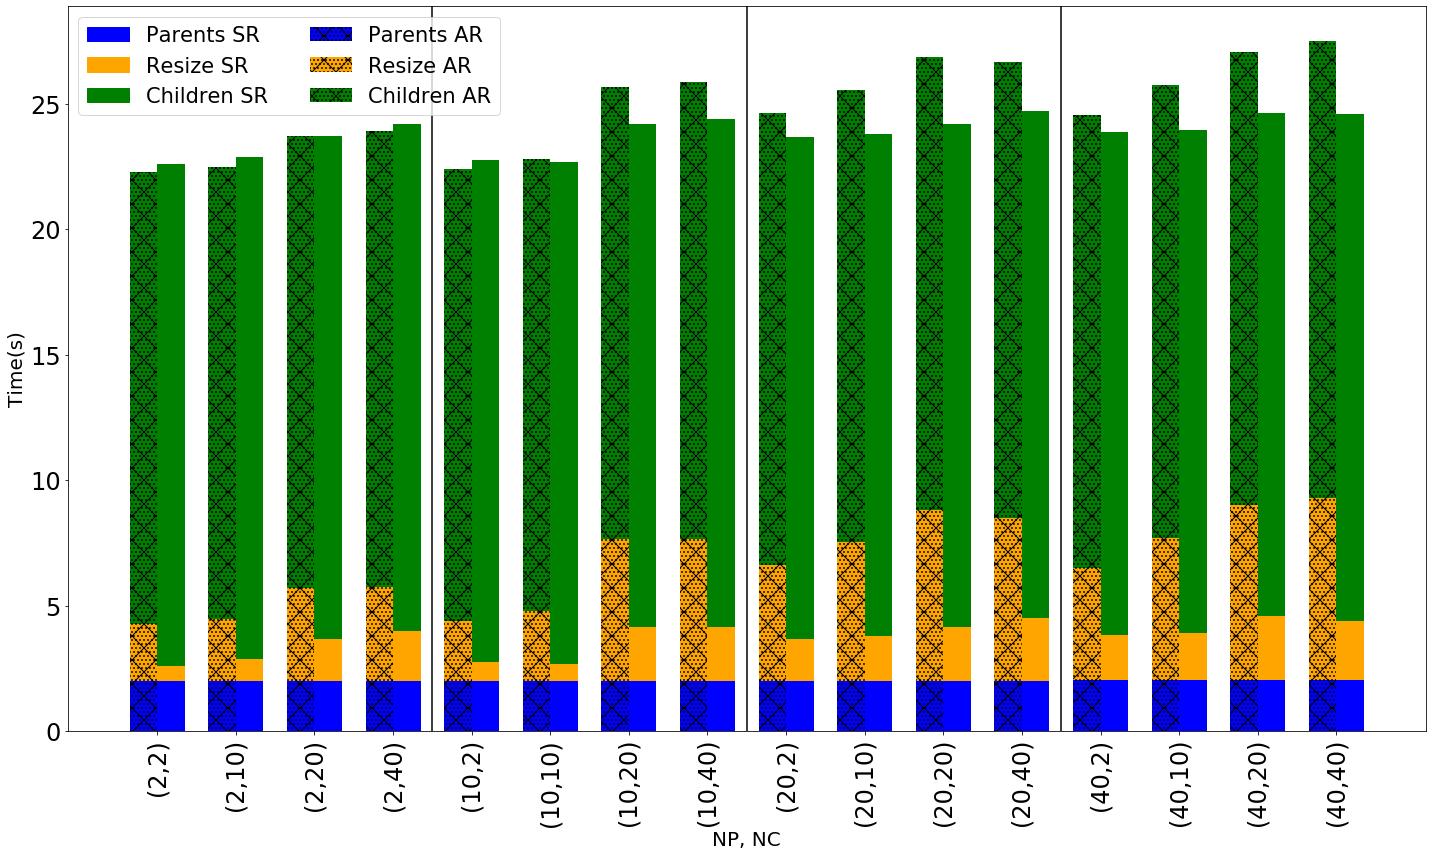

In [48]:
for dist in [1,2]:
    dist_index=dist-1
    f=plt.figure(figsize=(20, 12))
#for numP in values:

    x = np.arange(len(labelsP_J))

    width = 0.35
    sumaTP_TM = np.add(TP_data[dist_index], TM_data[dist_index]).tolist()
    sumaTP_TM_A = np.add(TP_A_data[dist_index], TM_A_data[dist_index]).tolist()

    ax=f.add_subplot(111)

    ax.bar(x+width/2, TP_data[dist_index], width, color='blue')
    ax.bar(x+width/2, TM_data[dist_index], width, bottom=TP_data[dist_index],color='orange')
    ax.bar(x+width/2, TH_data[dist_index], width, bottom=sumaTP_TM, color='green')

    ax.bar(x-width/2, TP_A_data[dist_index], width, hatch="\\/...", color='blue')
    ax.bar(x-width/2, TM_A_data[dist_index], width, bottom=TP_A_data[dist_index], hatch="\\/...", color='orange')
    ax.bar(x-width/2, TH_A_data[dist_index], width, bottom=sumaTP_TM_A, hatch="\\/...", color='green')

    ax.set_ylabel("Time(s)", fontsize=20)
    ax.set_xlabel("NP, NC", fontsize=20)
    plt.xticks(x, labelsP_J, rotation=90)

    blue_Spatch = mpatches.Patch(color='blue', label='Parents SR')
    orange_Spatch = mpatches.Patch(color='orange', label='Resize SR')
    green_Spatch = mpatches.Patch(color='green', label='Children SR')
    blue_Apatch = mpatches.Patch(hatch='\\/...', facecolor='blue', label='Parents AR')
    orange_Apatch = mpatches.Patch(hatch='\\/...', facecolor='orange', label='Resize AR')
    green_Apatch = mpatches.Patch(hatch='\\/...', facecolor='green', label='Children AR')


    handles=[blue_Spatch,orange_Spatch,green_Spatch,blue_Apatch,orange_Apatch,green_Apatch]

    plt.legend(handles=handles, loc='upper left', fontsize=21,ncol=2)
    
    ax.axvline((3.5), color='black')
    ax.axvline((7.5), color='black')
    ax.axvline((11.5), color='black')
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    
    f.tight_layout()
    f.savefig("Images/EX_Partitions_"+dist_names[dist]+".png", format="png")

In [49]:
#Reserva de memoria para las estructuras
TC_data=[0]*2
TS_data=[0]*2
TA_data=[0]*2

TC_A_data=[0]*2
TS_A_data=[0]*2
TA_A_data=[0]*2

for dist in [1,2]:
    dist_index=dist-1

    TC_data[dist_index]=[0]*len(values)*(len(values))
    TS_data[dist_index]=[0]*len(values)*(len(values))
    TA_data[dist_index]=[0]*len(values)*(len(values))

    TC_A_data[dist_index]=[0]*len(values)*(len(values))
    TS_A_data[dist_index]=[0]*len(values)*(len(values))
    TA_A_data[dist_index]=[0]*len(values)*(len(values))

#FIXME El TC actual no es la media de todos los del mismo tipo

if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

dist=1
for dist in [1,2]:
    dist_index=dist-1
    dist_v = str(dist)+","+str(dist)
    i=0
    r=0
    for numP in values:
        j=0
        for numC in values:
        
            test_tc_real = grouped_aggM_aux.loc[(numP,numC,dist_v)]['mean']
        #print(test_tc_real)
            for tipo in [0, 100]:
            
                test=grouped_aggM.loc[(dist_v,tipo,numP,numC)][['TS', 'TA']]
                test=test.tolist()
                    
                if tipo == 0:
                    TC_data[dist_index][i*len(values) + j] = test_tc_real
                    TS_data[dist_index][i*len(values) + j] = test[0] 
                    TA_data[dist_index][i*len(values) + j] = 0
                else:
                    TC_A_data[dist_index][i*len(values) + j] = test_tc_real
                    TS_A_data[dist_index][i*len(values) + j] = test[0]
                    TA_A_data[dist_index][i*len(values) + j] = test[1]
            j+=1
        i+=1
                    
                    
##########################

print(TC_data)
print(TC_A_data)
#print(TS_data)
#print(TA_data)

[[0.22771280000000002, 0.2951758, 0.4574467333333334, 1.0065502666666666, 0.2709764, 0.34524099999999996, 0.5523862666666667, 1.2616349333333332, 0.30655166666666667, 0.3979708, 0.6218607333333335, 1.4430508000000004, 0.5012709333333334, 0.9097184666666666, 1.1726962666666667, 1.4802842], [0.25073213333333333, 0.4431558666666667, 1.055341, 1.0189312666666666, 0.32123673333333336, 0.5652076666666667, 1.4103254666666665, 1.4033898666666669, 0.5978951333333333, 1.0128365333333333, 1.3475629999999998, 1.417449, 0.6253302000000001, 0.9833484666666668, 1.3360994, 1.4645820666666665]]
[[0.22771280000000002, 0.2951758, 0.4574467333333334, 1.0065502666666666, 0.2709764, 0.34524099999999996, 0.5523862666666667, 1.2616349333333332, 0.30655166666666667, 0.3979708, 0.6218607333333335, 1.4430508000000004, 0.5012709333333334, 0.9097184666666666, 1.1726962666666667, 1.4802842], [0.25073213333333333, 0.4431558666666667, 1.055341, 1.0189312666666666, 0.32123673333333336, 0.5652076666666667, 1.4103254666

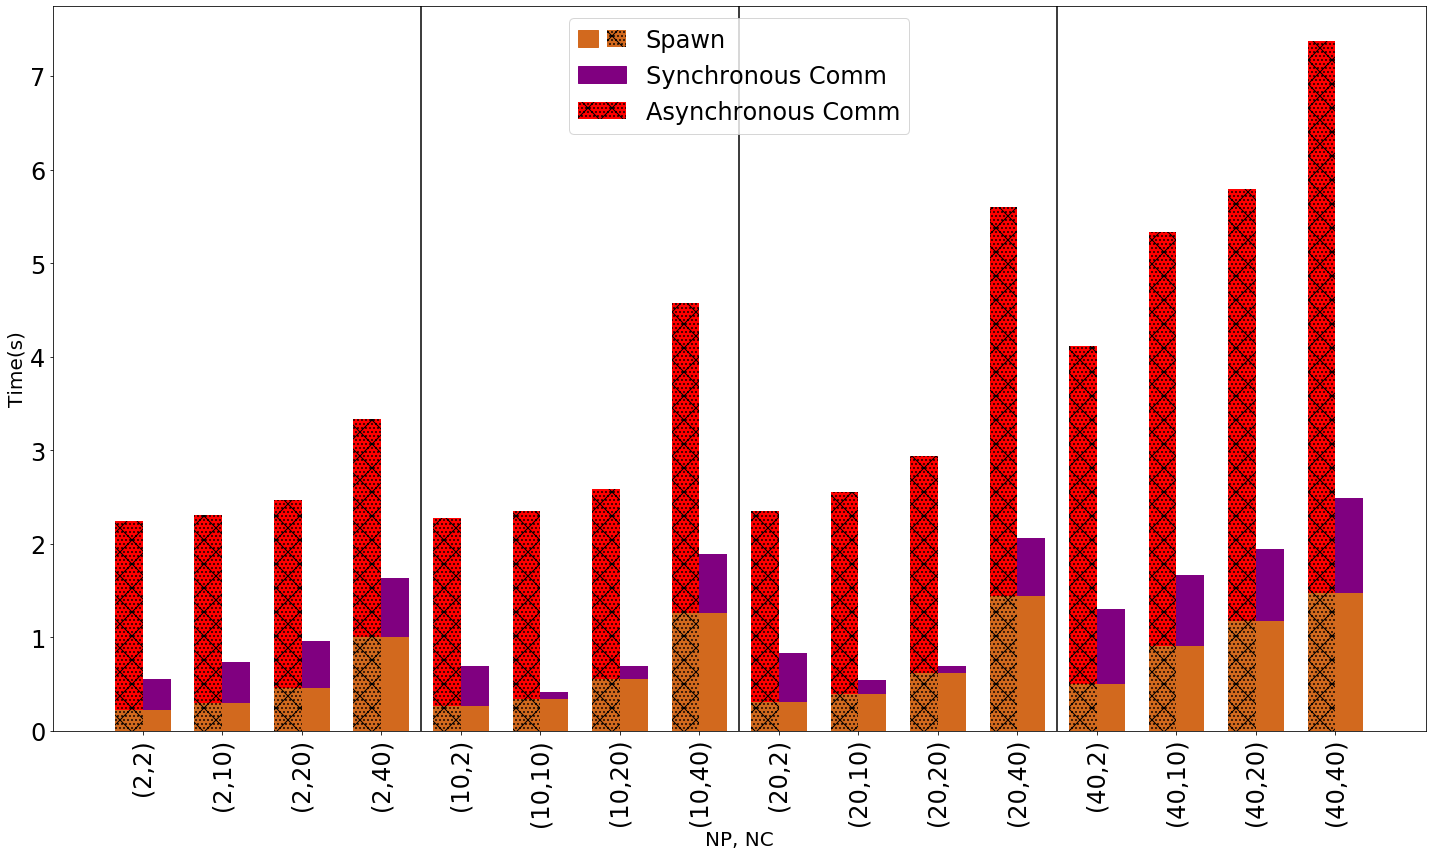

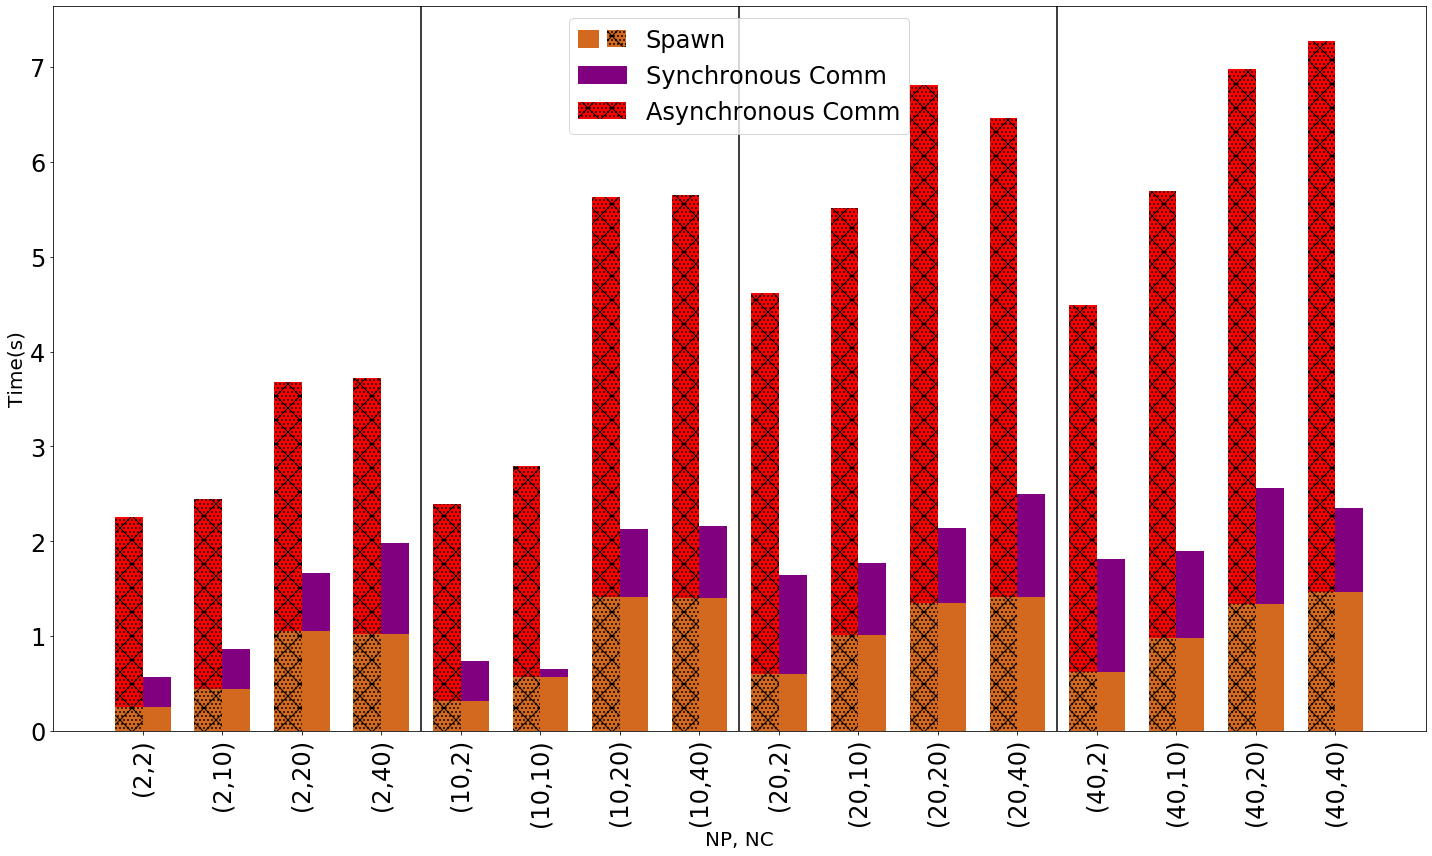

In [50]:
for dist in [1,2]:
    dist_index=dist-1
    f=plt.figure(figsize=(20, 12))

    x = np.arange(len(labelsP_J))
    width = 0.35
    sumaTC_TS_A = np.add(TC_A_data[dist_index], TS_A_data[dist_index]).tolist()

    ax=f.add_subplot(111)

    ax.bar(x+width/2, TC_data[dist_index], width, color='chocolate')
    ax.bar(x+width/2, TS_data[dist_index], width, bottom=TC_data[dist_index], color='purple')

    ax.bar(x-width/2, TC_A_data[dist_index], width, hatch="\\/...", color='chocolate')
    ax.bar(x-width/2, TS_A_data[dist_index], width, bottom=TC_A_data[dist_index], hatch="\\/...", color='purple')
    ax.bar(x-width/2, TA_A_data[dist_index], width, bottom=sumaTC_TS_A, hatch="\\/...", color='red')

    ax.set_ylabel("Time(s)", fontsize=20)
    ax.set_xlabel("NP, NC", fontsize=20)
    plt.xticks(x, labelsP_J, rotation=90)

    labels = ['Spawn', 'Synchronous Comm', 'Asynchronous Comm']
    brown_Spatch = mpatches.Patch(color='chocolate', label='Spawn')
    purple_Spatch = mpatches.Patch(color='purple', label='Synchronous Comm')
    brown_Apatch = mpatches.Patch(hatch='\\/...', facecolor='chocolate', label='Spawn')
    red_Apatch = mpatches.Patch(hatch='\\/...', facecolor='red', label='Asynchronous Comm')

    handles=[(brown_Spatch, brown_Apatch),purple_Spatch,red_Apatch]

    plt.legend(handles=handles, labels=labels, loc='upper center', fontsize=24, ncol=1, handler_map={tuple: HandlerTuple(ndivide=None)})
#bbox_to_anchor=(1, 0.5) --> Para sacar fuera de la grafica la leyenda

    ax.axvline((3.5), color='black')
    ax.axvline((7.5), color='black')
    ax.axvline((11.5), color='black')
    
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    
    f.tight_layout()
    f.savefig("Images/Malt_Partitions_"+dist_names[dist]+".png", format="png")

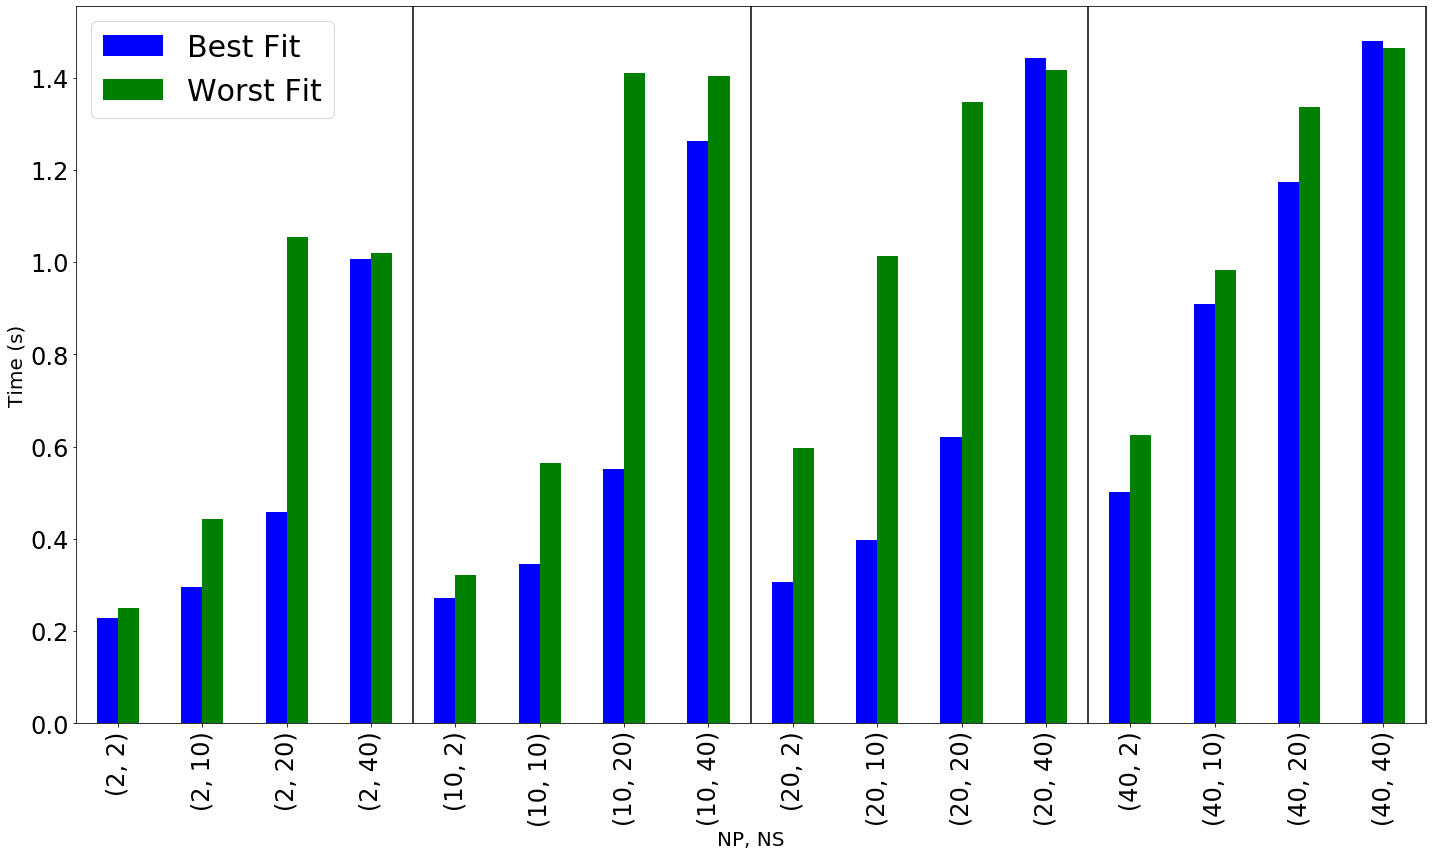

In [51]:
if(n_qty == 1):
    groupM_aux = dfM.groupby(['NP', 'NS'])['TC']
else:
    groupM_aux = dfM.groupby(['NP', 'NS', 'Dist'])['TC']

grouped_aggM_aux = groupM_aux.agg(['mean'])
grouped_aggM_aux.columns = grouped_aggM_aux.columns.get_level_values(0)

j = 0
f=plt.figure(figsize=(20, 12))
    
ax=f.add_subplot(111)
grouped_aggM_aux.unstack().plot(kind='bar', color=['b', 'g'], ax=ax) 
ax.set_ylabel("Time (s)", fontsize=20)
ax.set_xlabel("NP, NS", fontsize=20)
ax.legend(["Best Fit", "Worst Fit"], fontsize=30);

ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
ax.axvline((15.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    
f.tight_layout()
f.savefig("Images/TCR_Tiempo_Barras.png", format="png")
j = (j+1)%5

Para Tipo = 1
Para Tipo = 2


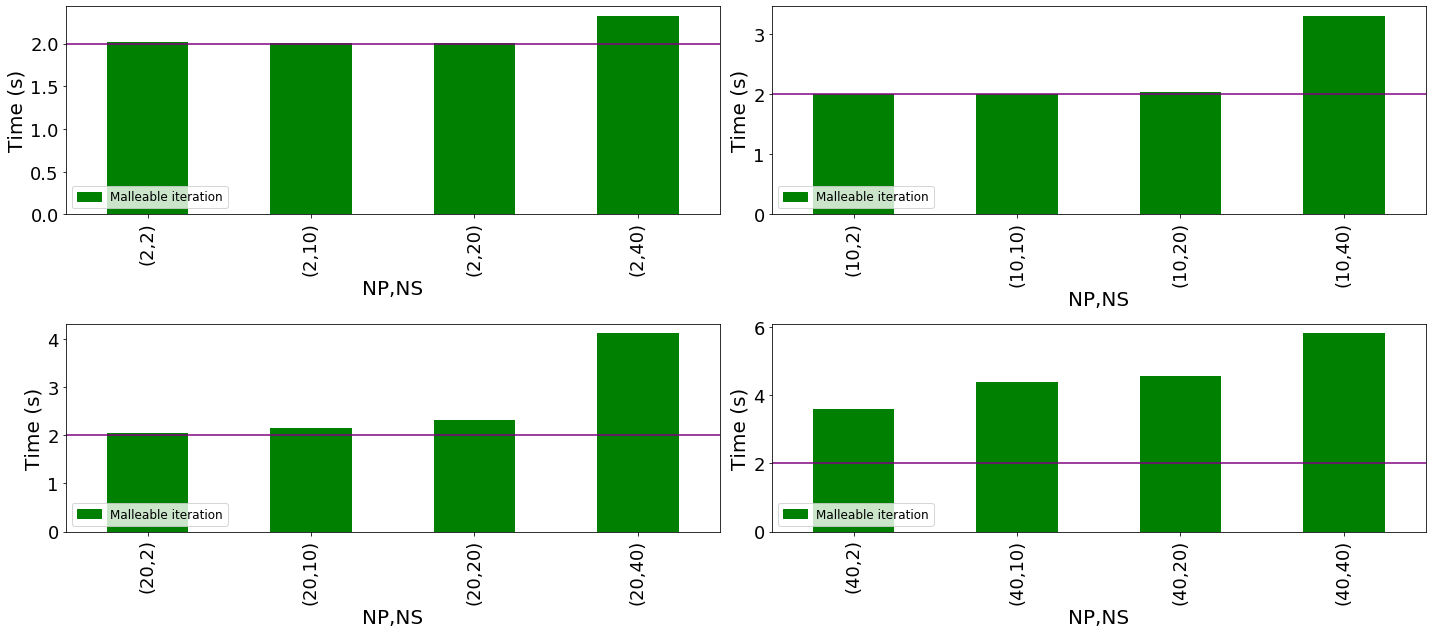

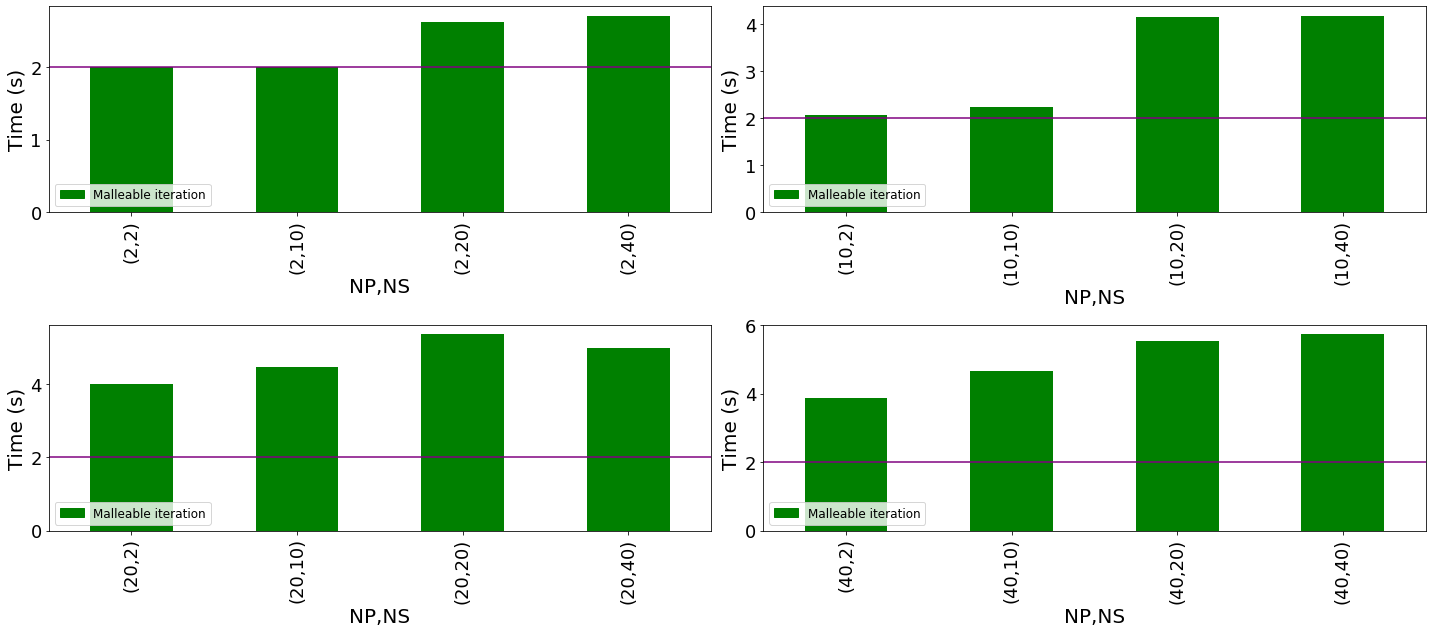

In [52]:
for i in range(1,3):
    print("Para Tipo = " + str(i))
    
    j = 0
    f=plt.figure(figsize=(20, 12))
    numC =2 
    for numP in values:

        ax=f.add_subplot(positions[j])
        
        t_par = grouped_aggL['Ti'].loc[(0,i,100,numP,slice(None))].mean()
        grouped_aggL['Ti'].loc[(1,i,100,numP,slice(None))].plot(kind='bar',color='green', ax=ax) 
        
        ax.axhline(y=t_par, xmin=0, xmax=1, color='purple')
        ax.set_ylabel("Time (s)", fontsize=20)
        ax.set_xlabel("NP,NS", fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=18)
        ax.tick_params(axis='both', which='minor', labelsize=22)
        
        locs, labels_aux = plt.xticks()
        plt.xticks(locs, labels=labelsP[j], rotation=90)
        
        
        blue_patch = mpatches.Patch(color='green', label='Malleable iteration')
        handles=[blue_patch]
        plt.legend(handles=handles, loc='lower left', fontsize=12)
        
        f.tight_layout()
        f.savefig("Images/Iter_type="+dist_names[i]+"_Perc_type="+str(100)+".png", format="png")
        j = (j+1)%5

In [53]:
dfG.columns

Index(['N', '%Async', 'Groups', 'Dist', 'Matrix', 'CommTam', 'Time', 'Iters',
       'TE', 'S'],
      dtype='object')

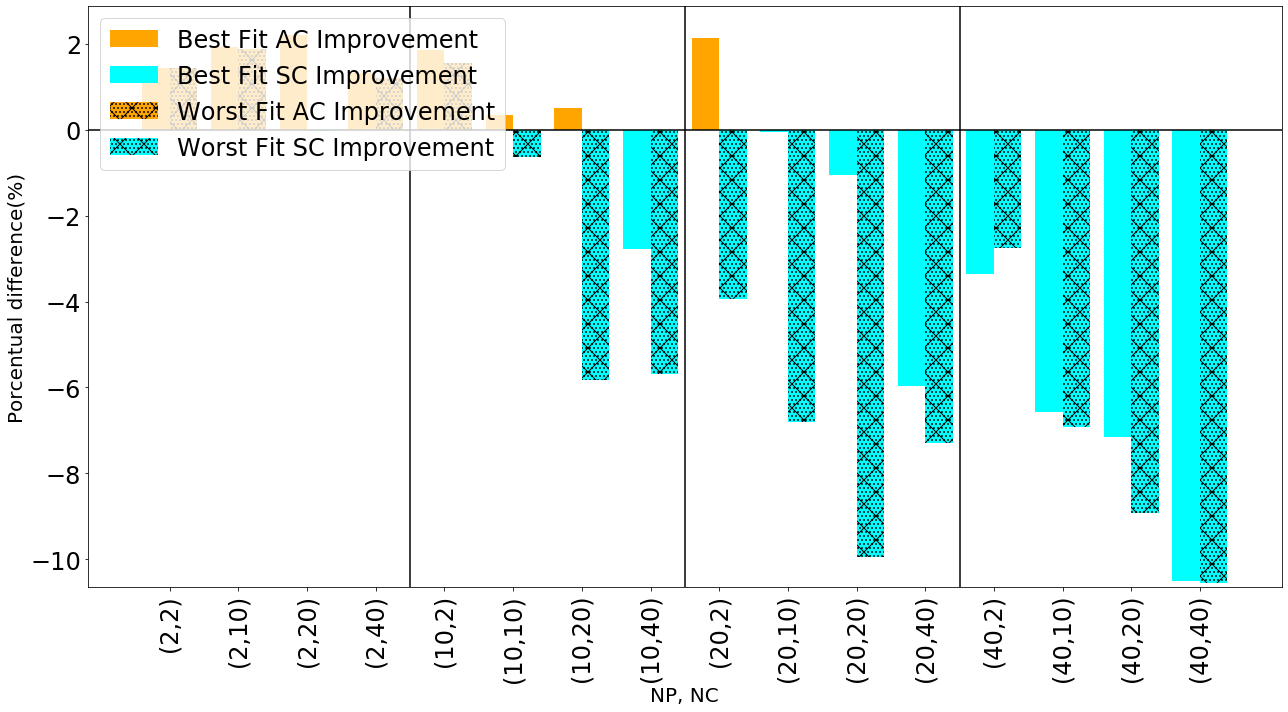

In [54]:
f=plt.figure(figsize=(18, 10))
#for numP in values:

x = np.arange(len(labelsP_J))

width = 0.4
middle = 0
ax=f.add_subplot(111)

for dist in [1,2]:
    dist_index=dist-1
    sumaTP_TM = np.add(TP_data[dist_index], TM_data[dist_index])
    bar_res = np.add(sumaTP_TM, TH_data[dist_index])

    sumaTP_TM_A = np.add(TP_A_data[dist_index], TM_A_data[dist_index])
    sumaTP_TM_A = np.add(sumaTP_TM_A, TH_A_data[dist_index])
    
    bar_res = np.divide(bar_res, sumaTP_TM_A)
    bar_res = (bar_res-1)*100

    supper = np.ma.masked_where(bar_res < middle, bar_res)
    slower = np.ma.masked_where(bar_res > middle, bar_res)

    plt.ylim(min(bar_res)-0.1, max(bar_res)+1) #FIXME Error cuando el max o min de dist=1 es mayor que el de dist=2

    offset = -width/2 # Best Fit
    patch = ""
    if dist == 2:
        offset = (width/2) # Worst Fit
        patch = "\\/..."
        
    ax.bar(x+offset, supper, width, color="orange", hatch=patch)
    ax.bar(x+offset, slower, width, color="cyan", hatch=patch)


ax.set_ylabel("Porcentual difference(%)", fontsize=20)
ax.set_xlabel("NP, NC", fontsize=20)
plt.xticks(x, labelsP_J, rotation=90)


orange_Bf_patch = mpatches.Patch(facecolor='orange', label='Best Fit AC Improvement')
blue_Bf_patch = mpatches.Patch(facecolor='cyan', label='Best Fit SC Improvement')
orange_Wf_patch = mpatches.Patch(hatch='\\/...', facecolor='orange', label='Worst Fit AC Improvement')
blue_Wf_patch = mpatches.Patch(hatch='\\/...', facecolor='cyan', label='Worst Fit SC Improvement')
handles=[orange_Bf_patch, blue_Bf_patch, orange_Wf_patch, blue_Wf_patch]
plt.legend(handles=handles, loc='upper left', fontsize=24)

ax.axhline((middle), color='black')
ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    
f.tight_layout()
f.savefig("Images/EX_Difference.png", format="png")
j = (j+1)%5

TypeError: only size-1 arrays can be converted to Python scalars

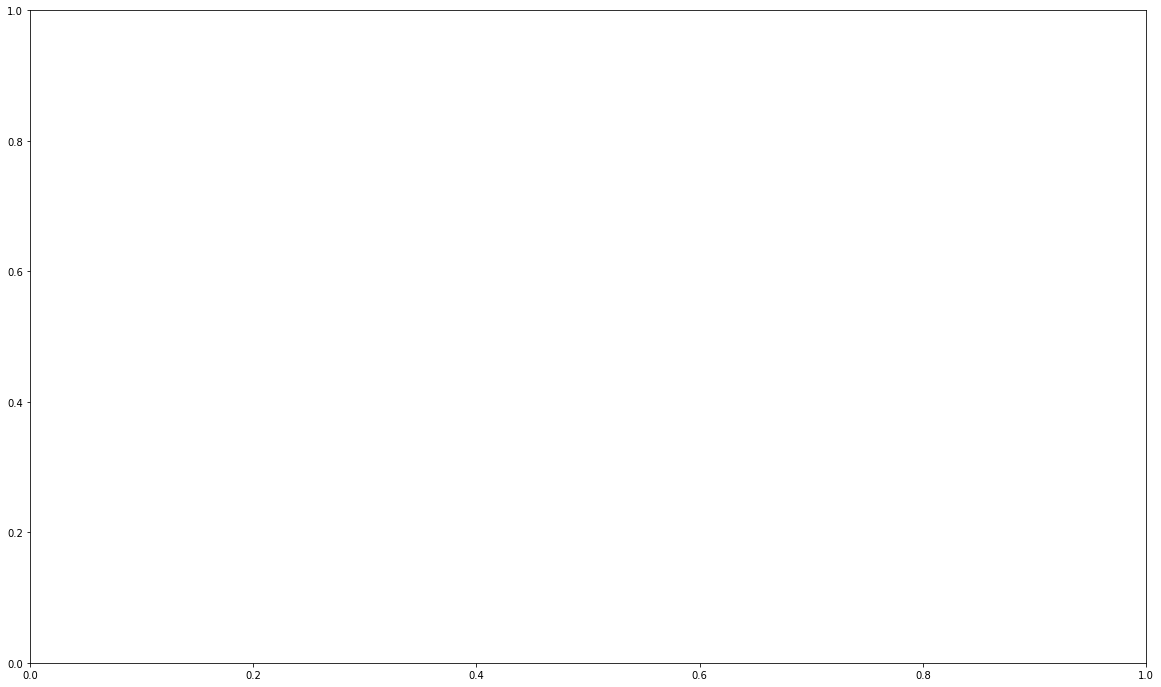

In [55]:
f=plt.figure(figsize=(20, 12))
#for numP in values:

x = np.arange(len(labelsP_J))

width = 0.4/2
sumaTP_TM = np.add(TP_data, TM_data).tolist()
sumaTP_TM_A = np.add(TP_A_data, TM_A_data).tolist()

ax=f.add_subplot(111)

ax.bar(x+width/2, TP_data, width, hatch="O", color='blue')
ax.bar(x+width/2, TM_data, width, hatch="O", bottom=TP_data,color='orange')
ax.bar(x+width/2, TH_data, width, hatch="O", bottom=sumaTP_TM, color='green')

ax.bar(x+width*1.5, TP_data, width, hatch="+O",color='blue')
ax.bar(x+width*1.5, TM_data, width, hatch="+O",bottom=TP_data,color='orange')
ax.bar(x+width*1.5, TH_data, width, hatch="+O",bottom=sumaTP_TM, color='green')

ax.bar(x-width/2, TP_A_data, width, hatch="\\/...", color='blue')
ax.bar(x-width/2, TM_A_data, width, bottom=TP_A_data, hatch="\\/...", color='orange')
ax.bar(x-width/2, TH_A_data, width, bottom=sumaTP_TM_A, hatch="\\/...", color='green')

ax.bar(x-width*1.5, TP_A_data, width, hatch="X", color='blue')
ax.bar(x-width*1.5, TM_A_data, width, bottom=TP_A_data, hatch="X", color='orange')
ax.bar(x-width*1.5, TH_A_data, width, bottom=sumaTP_TM_A, hatch="X", color='green')

ax.set_ylabel("Time(s)", fontsize=20)
ax.set_xlabel("NP, NC", fontsize=20)
plt.xticks(x, labelsP_J, rotation=90)

blue_Spatch = mpatches.Patch(color='blue', label='Parents SC')
orange_Spatch = mpatches.Patch(color='orange', label='Resize SC')
green_Spatch = mpatches.Patch(color='green', label='Children SC')
blue_Apatch = mpatches.Patch(hatch='\\/...', facecolor='blue', label='Parents AC')
orange_Apatch = mpatches.Patch(hatch='\\/...', facecolor='orange', label='Resize AC')
green_Apatch = mpatches.Patch(hatch='\\/...', facecolor='green', label='Children AC')


handles=[blue_Spatch,orange_Spatch,green_Spatch,blue_Apatch,orange_Apatch,green_Apatch]

plt.legend(handles=handles, loc='upper right', fontsize=21)
    
ax.axvline((3.5), color='black')
ax.axvline((7.5), color='black')
ax.axvline((11.5), color='black')
    
ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=22)
    #ax.axvline(4)
    
f.tight_layout()
f.savefig("Images/EX_Partitions_"+dist_names[dist]+".png", format="png")
j = (j+1)%5